In [50]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
import time

np.seterr(divide='ignore', invalid='ignore')

sys.path.insert(0, '../croprows-cli/src/')

In [51]:
img=[]
def addImagesArray(img_in):
    imgobj = cv2.imread(img_in)
    print('Added Image:'+img_in)
    img.append(imgobj)

In [52]:
img=[]
#addImagesArray('test_images/pic-col_11-row_13.jpg')
#addImagesArray('test_images/small_19.tif')
#addImagesArray('test_images/small_16.tif')
#addImagesArray('test_images/small_13.tif')
#addImagesArray('test_images/small_7.tif')
#addImagesArray('test_images/ortho_small.tif')
#addImagesArray('test_images/small_8.tif')
#addImagesArray('test_images/pic-col_6-row_6.jpg')
addImagesArray('../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/mosaic-cl_3-rw_2.jpg')

Added Image:../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/mosaic-cl_3-rw_2.jpg


In [53]:
def plotImagesArray(arr):
    arrlen = len(arr)
    for imgs in range(arrlen):
        plt.figure(figsize=(5, 5))
        plt.imshow(arr[imgs])
        plt.show()
        
        color = ('b','g','r')
        plt.figure()
        for i,col in enumerate(color):
            histr = cv2.calcHist([arr[imgs]],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
        plt.show()

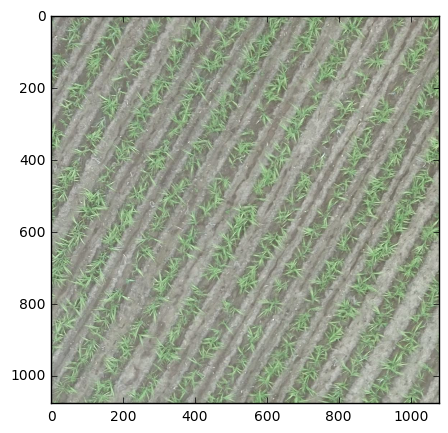

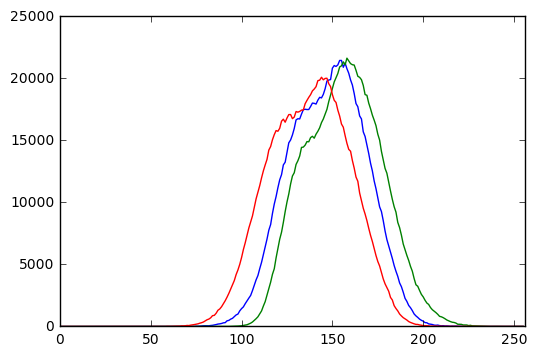

In [54]:
##Plot Images Array - Original
plotImagesArray(img)

In [55]:
##ExG 
def calc_ExG(image_in):
    B, G, R = cv2.split(image_in)
    R_ = R/256
    G_ = G/256
    B_ = B/256
    r= R_/(R_+G_+B_)
    g= G_/(R_+G_+B_)
    b= B_/(R_+G_+B_)
    return (2*g - r - b)

##ExR 
def calc_ExR(image_in):
    B, G, R = cv2.split(image_in)
    R_ = R/256
    G_ = G/256
    B_ = B/256
    r= R_/(R_+G_+B_)
    g= G_/(R_+G_+B_)
    b= B_/(R_+G_+B_)
    return (1.4*r - g)

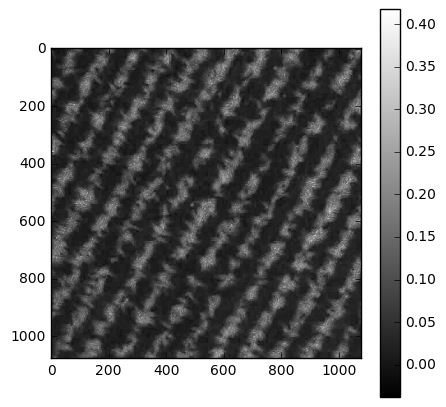

In [56]:
## Calc ExG in RGB Image
exg=[] 
for imgs in range(len(img)):
        exg_tmp = calc_ExG(img[imgs])
        exg.append(exg_tmp)
        plt.figure(figsize=(5, 5))
        plt.imshow(exg_tmp,cmap=plt.get_cmap('gray'))
        plt.colorbar()
        plt.show()

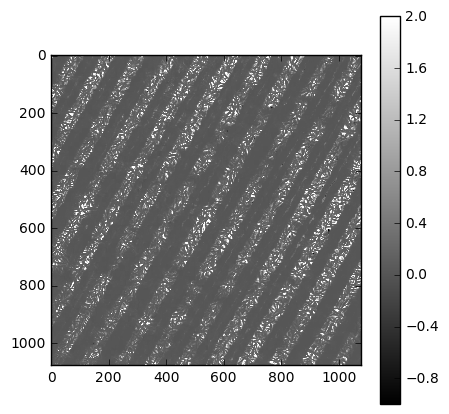

In [57]:
#Histogram Equalization
def histogramEqualize(image_in):
    img_yuv = cv2.cvtColor(image_in, cv2.COLOR_BGR2YUV)
    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return img_output


## Calc ExG in Histogram Equalized Image
exg_eh=[] 
for imgs in range(len(img)):
        exgeh_tmp =  calc_ExG(histogramEqualize(img[imgs]))
        exg_eh.append(exgeh_tmp)
        plt.figure(figsize=(5, 5))
        plt.imshow(exgeh_tmp,cmap=plt.get_cmap('gray'))
        plt.colorbar()
        plt.show()

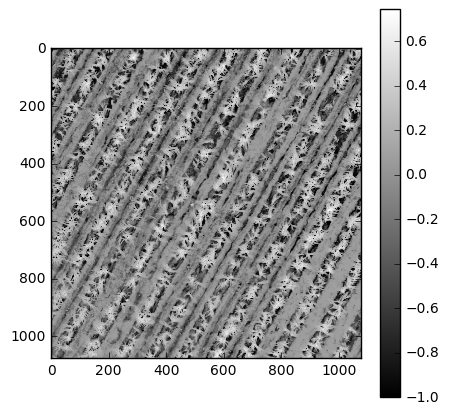

In [58]:
def equalize_hist(imgi):
    for c in range(0, 2):
        imgi[:,:,c] = cv2.equalizeHist(imgi[:,:,c])
    return imgi

## Calc ExG in Histogram Equalized Image (2)
exg_eh2=[] 
for imgs in range(len(img)):
        exgeh2_tmp =  calc_ExG(equalize_hist(img[imgs]))
        exg_eh2.append(exgeh2_tmp)
        plt.figure(figsize=(5, 5))
        plt.imshow(exgeh2_tmp,cmap=plt.get_cmap('gray'))
        plt.colorbar()
        plt.show()

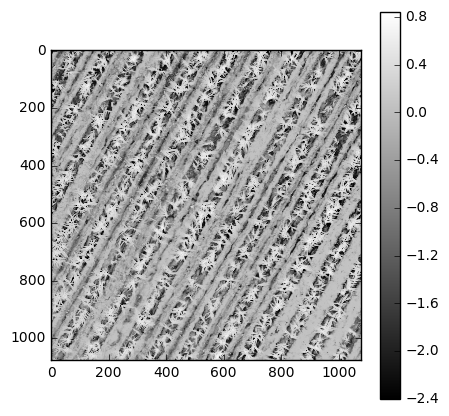

In [59]:
def calc_ExGExR(image_in):
    B, G, R = cv2.split(image_in)
    R_ = R/256
    G_ = G/256
    B_ = B/256
    r= R_/(R_+G_+B_)
    g= G_/(R_+G_+B_)
    b= B_/(R_+G_+B_)
    return calc_ExG(image_in)-(1.4*r-g)

## Calc ExGExR
exgexr=[] 
for imgs in range(len(img)):
        exg_tmp = calc_ExGExR(img[imgs])
        exgexr.append(exg_tmp)
        plt.figure(figsize=(5, 5))
        plt.imshow(exg_tmp,cmap=plt.get_cmap('gray'))
        plt.colorbar()
        plt.show()

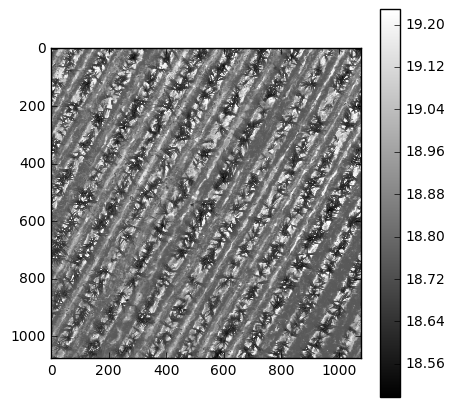

In [60]:
def calc_CIVE(image_in):
    B, G, R = cv2.split(image_in)
    R_ = R/256
    G_ = G/256
    B_ = B/256
    r= R_/(R_+G_+B_)
    g= G_/(R_+G_+B_)
    b= B_/(R_+G_+B_)
    return (0.441*r - 0.811*g + 0.385*b + 18.78745)

## Calc CIVE
cive=[] 
for imgs in range(len(img)):
        cive_tmp = calc_CIVE(img[imgs])
        cive.append(cive_tmp)
        plt.figure(figsize=(5, 5))
        plt.imshow(cive_tmp,cmap=plt.get_cmap('gray'))
        plt.colorbar()
        plt.show()

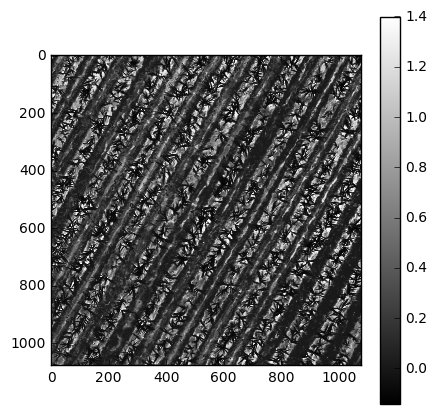

In [61]:
## Calc ExR in RGB Image
exr2=[] 
for imgs in range(len(img)):
        exr2_tmp = calc_ExR(img[imgs])
        exr2.append(exr2_tmp)
        plt.figure(figsize=(5, 5))
        plt.imshow(exr2_tmp,cmap=plt.get_cmap('gray'))
        plt.colorbar()
        plt.show()

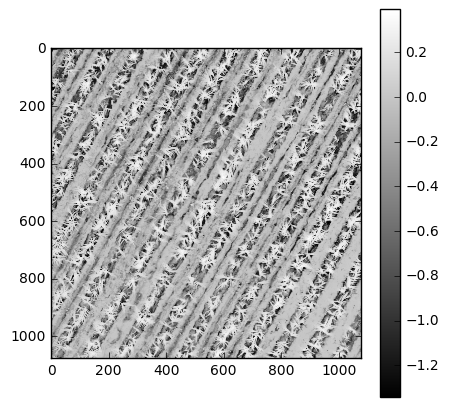

In [62]:
#ExG - ExR
dif_exgexr=[]
for imgsexgexr in range(len(exr2)):
    tmp_dif_exgexr = exg[imgsexgexr]- exr2[imgsexgexr]
    dif_exgexr.append(tmp_dif_exgexr)
    plt.figure(figsize=(5, 5))
    plt.imshow(tmp_dif_exgexr,cmap=plt.get_cmap('gray'))
    plt.colorbar()
    plt.show()

<h1>Segmentation</h1>

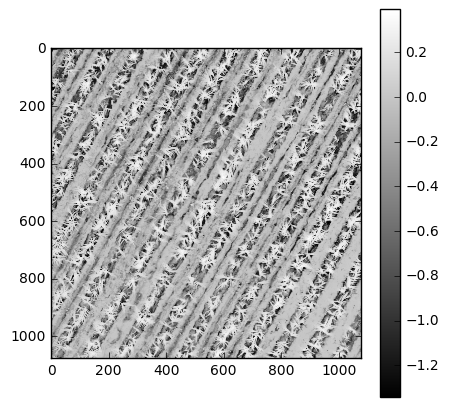

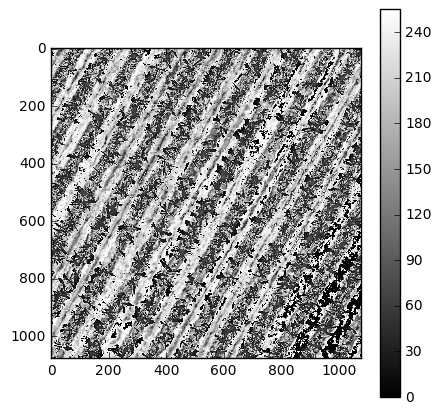

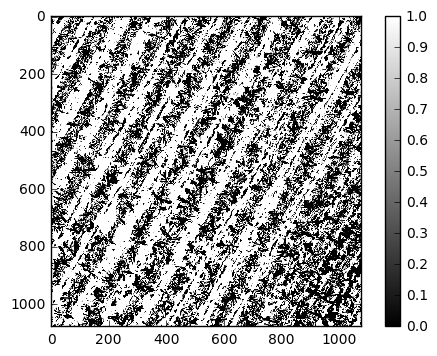

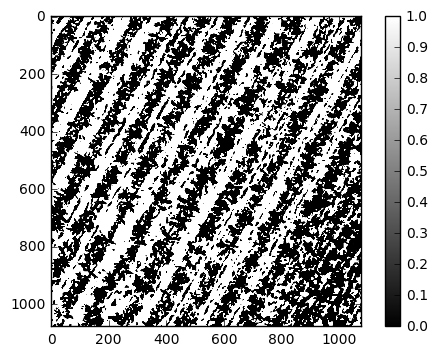

In [63]:
s1 = dif_exgexr[0]
ims1 = np.uint8(s1*256)


plt.figure(figsize=(5, 5))
plt.imshow(s1,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(ims1,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()


retval2,threshold1 = cv2.threshold(ims1,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(threshold1,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

img_blur = cv2.GaussianBlur(ims1,(9, 9), 2)
retval2,threshold2 = cv2.threshold(img_blur,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(threshold2,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

In [64]:
def skeletonize(imgg):
    imgg = imgg.copy() # don't clobber original
    skel = imgg.copy()
    skel[:,:] = 0
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
    while True:
        eroded = cv2.morphologyEx(imgg, cv2.MORPH_ERODE, kernel)
        temp = cv2.morphologyEx(eroded, cv2.MORPH_DILATE, kernel)
        temp  = cv2.subtract(imgg, temp)
        skel = cv2.bitwise_or(skel, temp)
        imgg[:,:] = eroded[:,:]
        if cv2.countNonZero(imgg) == 0:
            break
    return skel

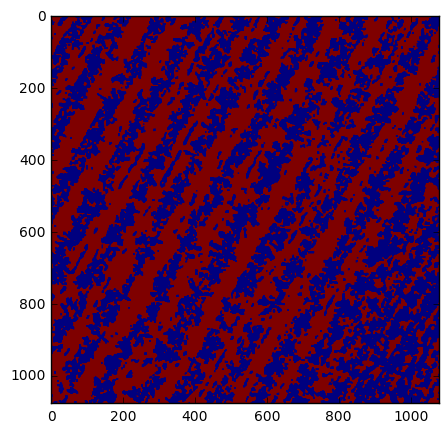

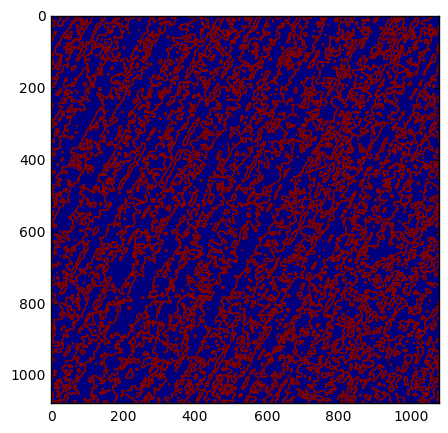

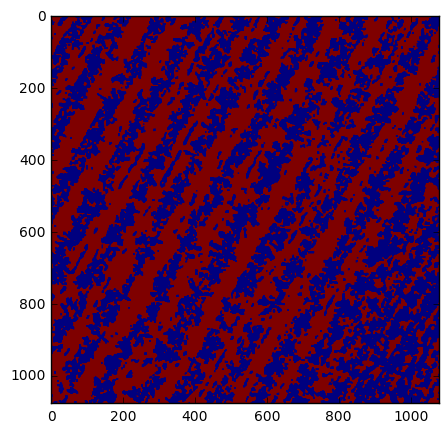

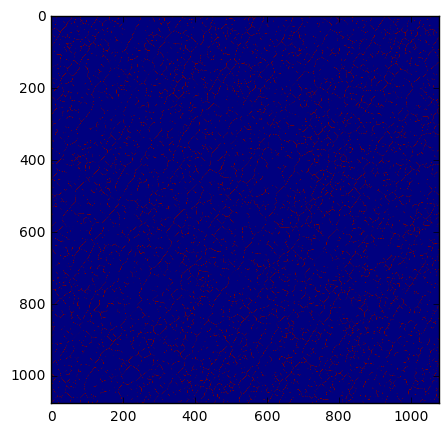

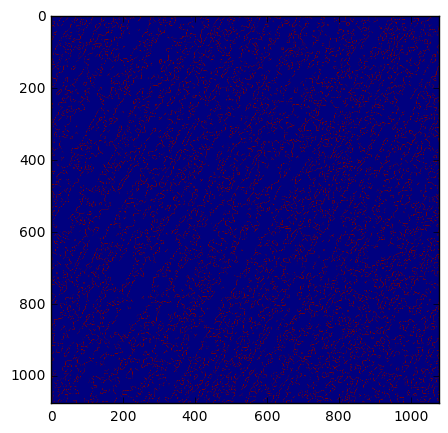

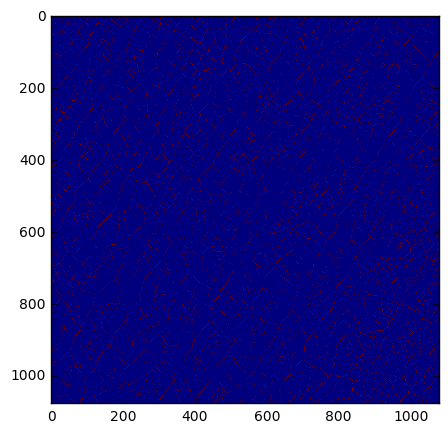

In [65]:
kernel = np.ones((5,5),np.uint8)

closing = cv2.morphologyEx(threshold2, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(5,5))
plt.imshow(closing)
plt.show()


gradient = cv2.morphologyEx(threshold2, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(5, 5))
plt.imshow(gradient)
plt.show()

dilation = cv2.dilate(closing,kernel,iterations = 2)
plt.figure(figsize=(5, 5))
plt.imshow(closing)
plt.show()

ske_closing = skeletonize(closing)
plt.figure(figsize=(5, 5))
plt.imshow(ske_closing)
plt.show()

ske_gradient= skeletonize(gradient)
plt.figure(figsize=(5, 5))
plt.imshow(ske_gradient)
plt.show()

ske_dilation= skeletonize(dilation)
plt.figure(figsize=(5, 5))
plt.imshow(ske_dilation)
plt.show()

In [66]:
def angle_between(p1, p2):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return np.rad2deg((ang1 - ang2) % (2 * np.pi))

In [67]:
ig=img[5]
plt.figure(figsize=(5, 5))
plt.imshow(ig)
plt.show()

minLineLengthx = 100
maxLineGapx = 10
th = 125
thta = np.pi / 180

lines = cv2.HoughLinesP(closing, 1, theta=thta, threshold=th, minLineLength=minLineLengthx, maxLineGap=maxLineGapx)

print(lines)

for line in lines:
    x1, y1, x2, y2 = line[0]
    #print(line[0])
    cv2.line(ig, (x1, y1), (x2, y2), (0, 255 ,0), 3)
    print(angle_between((x1, y1), (x2, y2)))
    #if(angle_between((x1, y1), (x2, y2)) > 10):
    #    cv2.line(imgcp, (x1, y1), (x2, y2), (0, 255,0), 3)
        #print('pasaron:'  + str(angle_between((x1, y1), (x2, y2))))
plt.figure(figsize=(5, 5))
plt.imshow(ig)
plt.show()

IndexError: list index out of range